성능 : 2880.133719114225


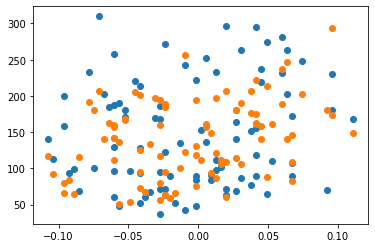

In [10]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

LEARNING_RATE = 0.1

diabetes=load_diabetes()

df_X = diabetes['data']
df_y = diabetes['target']

X = np.array(diabetes['data']) # 굳이 왜 하라는지 모르겠어요
y = np.array(diabetes['target']) # 굳이 왜 하라는지 모르겠어요

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # y_pred 준비
    y_pred = model(X, W, b)
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

W = np.random.rand(len(X_train[0]))
b = np.random.rand()

losses = []
for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    #if i % 100 == 0:
    #  print('Iteration %d : Loss %0.4f' % (i, L))

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print("성능 :",mse)

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [9]:
### 여기서부터 2번문제

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

 (1) 데이터 가져오기
 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

In [23]:
# 루트를 기준으로 데이터를 불러왔습니다.
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
print(train)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [24]:
# datetime 컬럼을 to_datetime를 이용하여 변환하였습니다.
# 편하게 사용하기위해서 date변수를 생성해서 대입해주었습니다.
train["datetime"] = pd.to_datetime(train["datetime"])
date = train['datetime'].dt

# 79줄 가이드라인에 맞춰서 수정해보겠습니다.
# train["year"], train["month"], train["day"], train["hour"], train["minute"], train["second"] = date.year , date.month , date.day , date.hour , date.minute , date.second
train["year"] = date.year
train["month"] = date.month
train["day"] = date.day
train["hour"] = date.hour
train["minute"] = date.minute
train["second"] = date.second

(3) year, month, day, hour, minute, second 데이터 개수 시각화하기

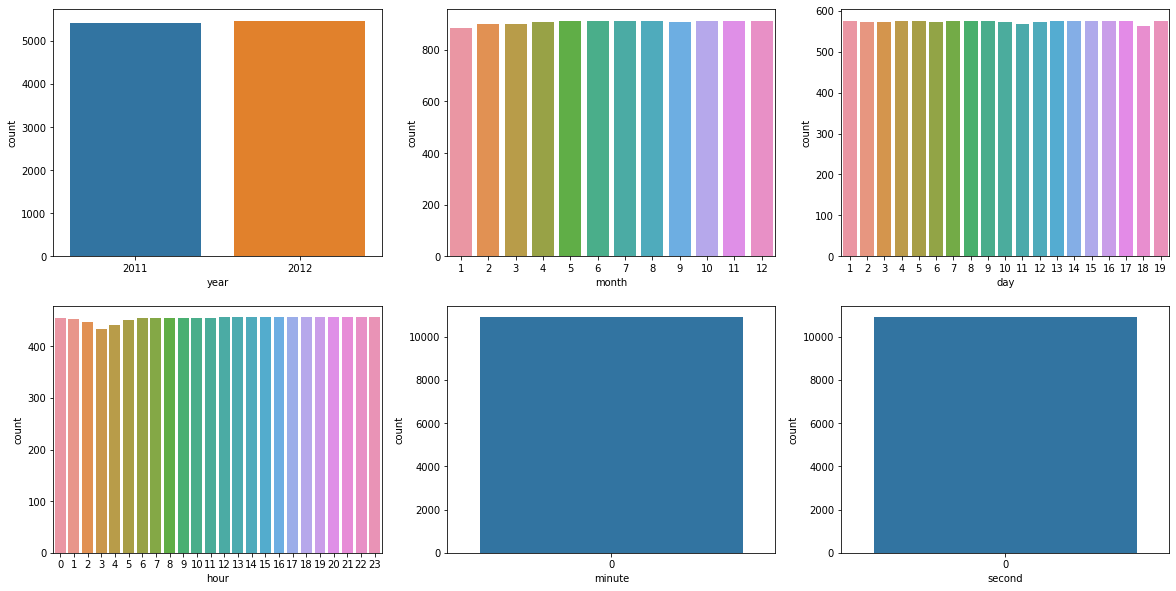

In [25]:
# 카운트 플롯을 데이터 추가가 되어도 효율적으로 사용할 수 있도록 for문을 이용해서 생성해주었습니다.
#print(train["month"].value_counts())
#sns.countplot(x="year",data=train, ax=ax[0,0])
arr = [["year","month","day"],["hour","minute","second"]]
# 서브 플롯을 2행 3열로 쪼개서 전체적은 크기는 20 x 10 으로 지정해보았습니다.
fig, ax = plt.subplots(2,3 , figsize=(20,10))
for i,r in enumerate(arr):
  for j,v in enumerate(r):
    # 카운트 플롯의 위치를 리스트의 형태에 맞게 집어넣어주었습니다.
    sns.countplot(x=v,data=train, ax=ax[i,j])
fig.show()

X, y 컬럼 선택 및 train/test 데이터 분리

In [26]:
# 필요없다고 판단되는 행 데이터들을 지워주고, count데이터를 y에 넣어주었습니다.
X = train.drop(["datetime", "casual","registered","count"], axis=1)
y = train["count"]
# 특별 옵션을 주지않고 기본옵션을 통해서 train , test를 분할하였습니다.
# 테스트 사이즈를 지정하지않았으므로 default value 0.25값으로 생성이됩니다.
X_train ,X_test ,y_train, y_test = train_test_split(X,y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8164, 14)
(2722, 14)
(8164,)
(2722,)


(5) LinearRegression 모델 학습

In [19]:
# LinearRegression 모델을 불러와 학습을 시켜줍니다.
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [20]:
# predict를 이용해서 학습된 모델의 예측값을 가져옵니다.
y_predict = lr.predict(X_test)

# mean_squared_error를 이용해서 MSE값을 가져오고 RMSE값도 출력해줍니다.
MSE = mean_squared_error(y_test, y_predict) 
print(f"MSE : {MSE}")
print(f"RMSE : {np.sqrt(MSE)}")

MSE : 21114.123817279004
RMSE : 145.30699851445218


(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

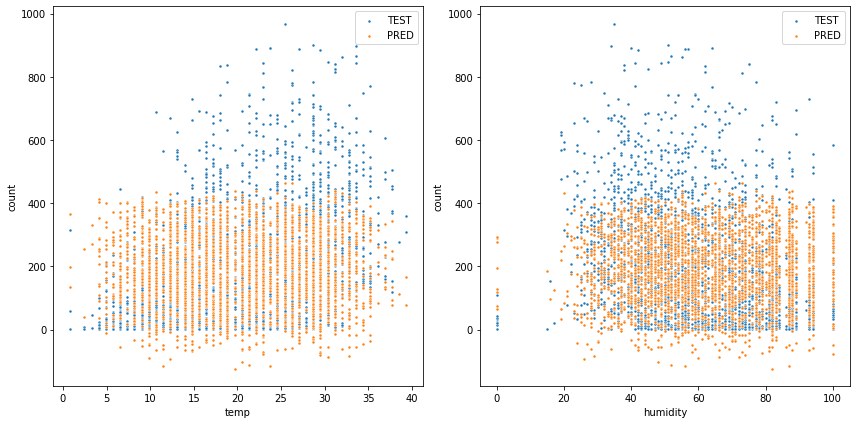

In [27]:
fig2 = plt.figure(figsize = (12, 6))

# 편리한 사용을 위해서 출력할 컬럼을 지정해주었습니다.
columns = ["temp", "humidity"]
for i in range(2):
    plt.subplot(121 + i)
    # for 문을 이용해서 컬럼별 scatterplot 을 그려주었습니다.
    sns.scatterplot(x = X_test[columns[i]], y = y_test, label = "TEST", marker = ".")
    sns.scatterplot(x = X_test[columns[i]], y = y_predict, label = "PRED", marker = ".")
    plt.legend()
    
plt.tight_layout()
plt.show()

In [ ]:
회고록: 처음으로 협업하여 코딩을 해보니, 신선하였습니다
같은 기능의 코드라도 사람마다 각자 다른 아이디어로 구현될 수 있다는 것을 몸소 깨달을 수 있었습니다
서로 아이디어를 교환하며 어떤 방식이 효율적인지 고민하는 과정 또한 유익하였습니다.
주피터 단축키를 잘 몰라서 조금 해맸습니다. 단축키를 조금 공부해야할 것 같습니다.